## Введение в анализ данных, ИАД-6

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Елена Смысловских

### Общая информация

__Дата выдачи:__ 06.02.2020

__Дедлайн:__ 17.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждые 2 задачи сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) идет балл в бонус. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл от оценки в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Необходимое, но не достаточное условие для успешного выполнения этой части — вам необходимо пройти все `assert`'ы.

In [2]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес проверочных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [30]:
def result_mark(weights: np.array, marks: np.array) -> int:
    a = np.array(weights * marks)
    b = np.sum(a)
    c = int(np.rint(b))
    return c

In [31]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [32]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$). Например, для `a = np.array([4, 2, 6, 3])` и `b = np.array([4, 3, 6, -3])` ответом является кортеж `(4, 6)`.

In [141]:
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    c = (a == b)
    d = np.extract(c, b)
    e = np.min(d)
    f = np.max(d)
    return (e,f)


In [142]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [143]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [144]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [210]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    mod = (np.absolute(array1 - array2)) <= precision
    d = np.nonzero(mod)
    print(d)
    d1 = np.ravel(d)
    return d1

In [214]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

(array([0, 1, 3, 6], dtype=int64),)


In [213]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

(array([1, 3], dtype=int64),)


### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [225]:
def block_matrix(block: np.array) -> np.array:
    half = np.hstack((block, block))
    matrix = np.vstack((half, half))
    return matrix

In [226]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [233]:
def diag_prod(matrix: np.array):
    diag = np.diagonal(matrix)
    diag1 = np.extract(diag != 0, diag)
    prod = diag1.prod()
    return prod

In [234]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [241]:
def normalize(matrix: np.array) -> np.array:
    sd = np.std(matrix, axis = 0)
    mean = np.mean(matrix, axis = 0)
    cond = (sd != 0)
    normatrix = np.where(cond,((matrix - mean)/sd), 0)
    return normatrix

In [242]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [243]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [254]:
def make_symmetric(matrix: np.array) -> np.array:
    matrix1 = matrix.T
    diagonal = matrix.diagonal()
    matrix2 = matrix + matrix1 - np.diag(diagonal)
    return matrix2

In [255]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [256]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 8

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [265]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    block = np.arange(a,b+1)
    matrix1 = np.tile(block, [m,1])
    return matrix1

In [266]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [267]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 9

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [126]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    s = np.dot(vec1, vec2)/np.linalg.norm(vec1)/np.linalg.norm(vec2)
    return s

In [127]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [128]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

### 10

Напишите функцию, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [382]:
def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    x = np.array(np.random.uniform(lims[0], lims[1], size = n))
    u = np.array(np.random.uniform(-noise_level, noise_level, size = n))
    y = k * x + u
    return (x,y)

In [383]:
# Выход должен выглядеть примерно так

gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([-0.98249683,  0.18454195,  0.97974699, -0.89863497, -0.91320078,
         0.11026342, -0.16544196,  0.08315937, -0.47580015, -0.3510198 ,
        -0.15283149,  0.55847061,  0.66490061,  0.77290661, -0.75549366,
         0.28559857,  0.70702856, -0.46678272, -0.67727681, -0.98598091]),
 array([-1.96265818,  0.46047062,  1.98705799, -1.89036772, -1.78858923,
         0.23640415, -0.36400295,  0.24858023, -1.01738716, -0.63618846,
        -0.22660838,  1.11822923,  1.35674613,  1.6059978 , -1.46137598,
         0.65054282,  1.48412674, -0.89284267, -1.27205429, -1.94042167]))

## Часть 2. Pandas

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [252]:
import os
os.chdir('C:/Users/User/Dropbox/politfuck/2 курс/иад')
df = pd.read_csv('train.csv')
size = df.size
shape = df.shape
head = df.head(5)
tail = df.tail(5)
dtypes = df.dtypes # типы признаков
print(size, ' - число элементов в таблице')
print(shape, '- размер таблицы') # размер таблицы = 10692, 891 x 12
print(head, tail)
print('Типы признаков: ')
print(dtypes)

10692  - число элементов в таблице
(891, 12) - размер таблицы
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123     

### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Вещественные: PassengerId, Survived, Pclass, SibSp, Parch (целочисленные) и Age, Fare. Категориальные: Name, Sex, Ticket, Cabin, Embarked.

Задачи:

1. Задача регрессии
По цене билета (Fare) спрогнозируйте вероятность выживания (Survival) пассажира.

2. Задача  классификации
По цене билета (Fare) определите предполагаемый класс (Pclass), которым ехал пассажир.

3. Задача кластеризации
По данным о количестве родственников на борту (SibSp, Parch) сгруппируйте пассажиров по группам: путешествующие в одиночку, с 1 родственником, с 2 и более родственниками.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [253]:
surv = df[df['Survived'] == 1]
allsurv = len(surv.index) - 1
all = len(df.index) - 1
sharesurv = np.round((allsurv / all), 2)
fsurv = surv[df['Sex'] == 'female']
msurv = surv[df['Sex'] == 'male']
shfsurv = np.round((len(fsurv.index) / allsurv), 2)
shmsurv = np.round((len(msurv.index) / allsurv), 2)
print(sharesurv, ' - доля выживших пассажиров')
print(shfsurv, ' - доля женщин среди выживших,', shmsurv, ' - доля мужчин среди выживших')

0.38  - доля выживших пассажиров
0.68  - доля женщин среди выживших, 0.32  - доля мужчин среди выживших


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [254]:
cl = df['Pclass'].value_counts()
pas = df.groupby(df['Pclass'] == 3)['Sex'].value_counts()
print(cl)
print(pas)
print('Количество пассажиров по классам: Upper - 216 чел., Middle - 184 чел., Lower - 491 чел.')
print('В самом многолюдном классе было больше мужчин (347) по сравнению с женщинами (144).')

3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass  Sex   
False   male      230
        female    170
True    male      347
        female    144
Name: Sex, dtype: int64
Количество пассажиров по классам: Upper - 216 чел., Middle - 184 чел., Lower - 491 чел.
В самом многолюдном классе было больше мужчин (347) по сравнению с женщинами (144).


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Оплата проезда: средняя -  32.2 $, минимальная -  0.0 $, максимальная -  512.33 $
Оплата проезда пассажиров, которые сели на корабль в Саутгемптоне: средняя -  27.08 $, минимальная -  0.0 $, максимальная -  263.0 $


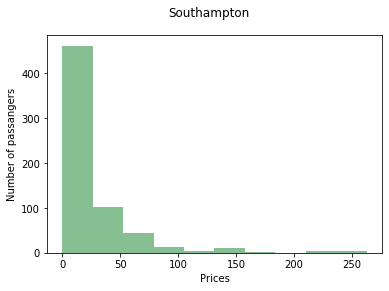

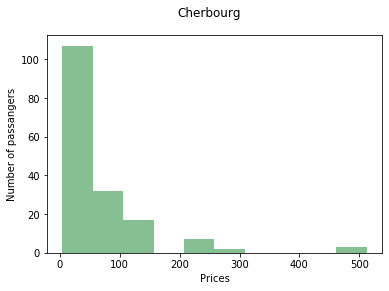

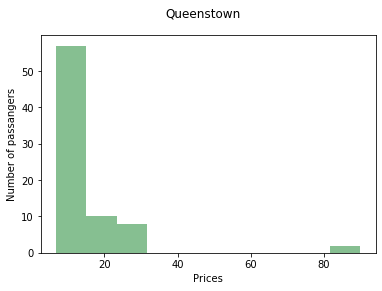

In [256]:
a_all = np.round(df['Fare'].mean(), 2)
b_all = np.round(df['Fare'].min(), 2)
c_all = np.round(df['Fare'].max(), 2)
print('Оплата проезда: средняя - ', a_all, '$, минимальная - ', b_all, '$, максимальная - ', c_all, '$')
embs = df[df['Embarked'] ==  'S']
a_s = np.round(embs['Fare'].mean(), 2)
b_s = np.round(embs['Fare'].min(), 2)
c_s = np.round(embs['Fare'].max(), 2)
print('Оплата проезда пассажиров, которые сели на корабль в Саутгемптоне: средняя - ', a_s, '$, минимальная - ', b_s, '$, максимальная - ', c_s, '$')
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
dfh = df[['Embarked','Fare']]
rep = dfh.replace({'C':'Cherbourg','S':'Southampton', 'Q': 'Queenstown'})

plt.figure()
hist1 = rep[rep["Embarked"]=="Southampton"].Fare.plot(kind='hist',
                subplots=True,sharex=True,sharey=True,title='Southampton', color='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Number of passangers')
print(hist1)

plt.figure()
hist2 = rep[rep["Embarked"]=="Cherbourg"].Fare.plot(kind='hist',
                subplots=True,sharex=True,sharey=True,title='Cherbourg', color='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Number of passangers')
print(hist2)

plt.figure()
hist3 = rep[rep["Embarked"]=="Queenstown"].Fare.plot(kind='hist',
                subplots=True, sharex=True, sharey=True, 
                title='Queenstown', color='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Number of passangers')
print(hist3)

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [347]:
del df['PassengerId']
del df['Ticket']
print(df)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch  Family  young1cl     Fare Cabin Embarked  
0      male

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [257]:
null = pd.isnull(df).sum()
print(null)
print('Пропуски есть в столбцах Age (177), Cabin (687) и Embarked (2).')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Пропуски есть в столбцах Age (177), Cabin (687) и Embarked (2).


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [274]:
med = df['Age'].median()
print(med) # медианный возраст -- 28 лет
df['Age'].fillna(med, inplace = True) # возраст можно заменить на медианный возраст всех пассажиров
df['Cabin'].fillna('Na', inplace = True)
df['Embarked'].fillna('Na', inplace = True)
res = pd.isnull(df).sum() # проверяем, есть ли пропуски
print(res)

28.0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

          Fare       Age
Fare  1.000000  0.096688
Age   0.096688  1.000000
Корреляция 0.096, т.е. зависимость очень слабая.
AxesSubplot(0.125,0.125;0.775x0.755)


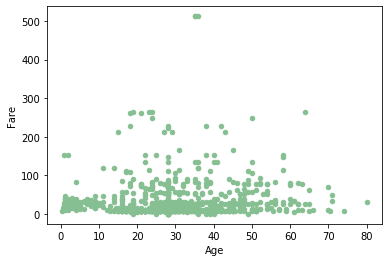

In [282]:
datacorr1 = df[['Fare', 'Age']]
correlation1 = datacorr1.corr(method = 'pearson')
print(correlation1) 
print('Корреляция 0.096, т.е. зависимость очень слабая.')
plotcorr1 = df.plot.scatter(x='Age', y='Fare', c='#86bf91')
print(plotcorr1)

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? А от места посадки?

In [313]:
datacorr2 = df[['Fare', 'Survived']]
correlation2 = datacorr2.corr(method = 'pearson')
print(correlation2) 
print('Зависимость выживаемости от цены билета положительная, но очень слабая (0.26)')
datacorr3 = df[['Pclass', 'Survived']]
correlation3 = datacorr3.corr(method = 'pearson')
groupby3 = datacorr3.groupby('Pclass')['Survived'].describe()
print(groupby3)
print(correlation3) 
print('Зависимость выживаемости от класса отрицательная, но слабая (- 0.33). Исходя из разбиения по группам, видно, что среди пассажиров 1-го класса среднее по выживаемости = 0.62, что значительно выше, чем у 2-го класса (0.47) и у 3-го класса (0.24).')
datacorr4 = df[['Embarked', 'Survived']]
correlation4 = datacorr4.corr(method = 'pearson')
print(correlation4)
groupby4 = datacorr4.groupby('Embarked')['Survived'].describe()
print(groupby4)
print('Зависимость выживаемости от места посадки: пассажиры, севшие в Cherbourg, выживали с верояностью 0.55, что превышает вероятности пассажиров, севших в Queenstown (0.39) и Southampton (0.37).')

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000
Зависимость выживаемости от цены билета положительная, но очень слабая (0.26)
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2       184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3       491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0
            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000
Зависимость выживаемости от класса отрицательная, но слабая (- 0.33). Исходя из разбиения по группам, видно, что среди пассажиров 1-го класса среднее по выживаемости = 0.62, что значительно выше, чем у 2-го класса (0.47) и у 3-го класса (0.24).
          Survived
Survived       1.0
          count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  0.553571  0.498608  0.0  0.0  1

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [339]:
df.insert(8, "Family", df['SibSp'] + df['Parch'] + 1)
df.insert(9, "young1cl", (df['Age'] < 30) & (df['Pclass'] == 1) == True) # посчитаем число молодых пассажиров, которые ехали 1-м классом (потенциальные активные капиталовладельцы)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [397]:
print('Задание: как был связан класс пассажира с наличием родственников на борту? Можно ли сказать, что более обеспеченные люди путешествовали вместе с семьей, в то время как менее обеспеченные - в одиночку?')
df.groupby(['Pclass', 'Family']).size()
bfshare1 = (len(np.where((df['Family'] > 4) & df['Pclass'] == 1)))/len(df[df['Pclass'] == 1])
print(bfshare1)
bfshare2 = (len(np.where((df['Family'] > 4) & df['Pclass'] == 2)))/len(df[df['Pclass'] == 2])
print(bfshare2)
bfshare3 = (len(np.where((df['Family'] > 4) & df['Pclass'] == 3)))/len(df[df['Pclass'] == 3])
print(bfshare3)
print('Как видно из выдачи, гипотеза оказалась неверной, и самая высокая доля ббольших семей (более 4 человек) среди пассажиров 2 класса. ')

Задание: как был связан класс пассажира с наличием родственников на борту? Можно ли сказать, что более обеспеченные люди путешествовали вместе с семьей, в то время как менее обеспеченные - в одиночку?
0.004629629629629629
0.005434782608695652
0.002036659877800407
Как видно из выдачи, гипотеза оказалась неверной, и самая высокая доля ббольших семей (более 4 человек) среди пассажиров 2 класса. 


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Отнормируем признаки:
Отсюда видно, что при нормировании данных одна из гистограмм - распределение цены билета (Fare) - стала выглядеть гораздо правдоподобнее. Остальные гистогаммы не изменились, при этом график распределения Age лучше оставить в первоначальном варианте, т.к. там было указано именно количество пассажиров, а сам график не изменился. С точки зрения машинного обучения, вещественные признаки не всегда отражают реальные числовые расстояния, и поэтому на новых данных рассчитывается не та "разница", которая была содержательно заложена в категориях, данных в числовом формате.


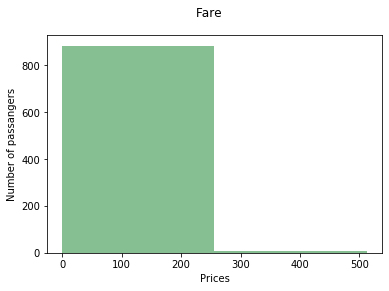

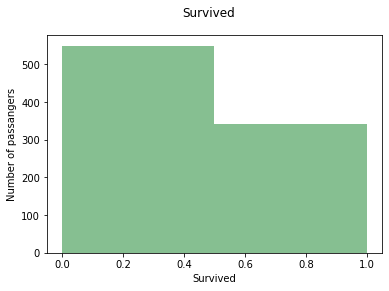

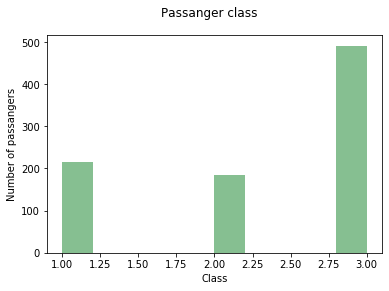

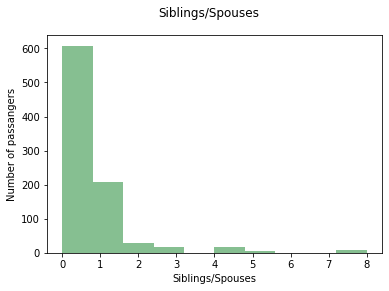

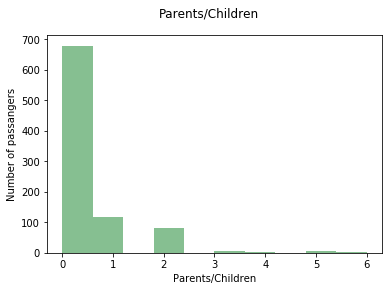

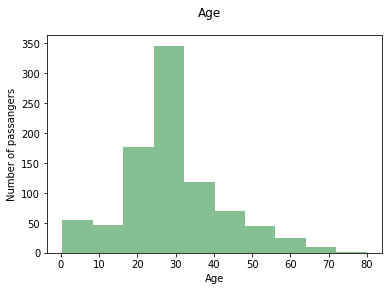

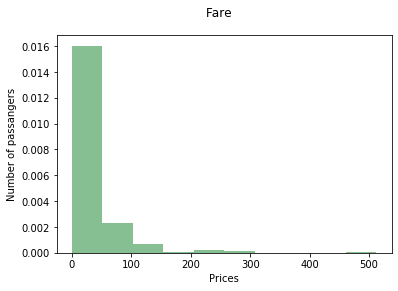

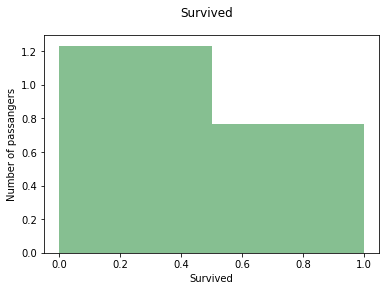

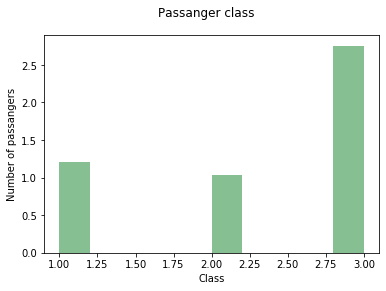

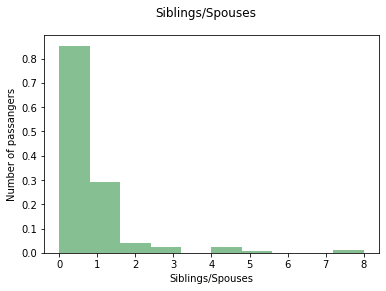

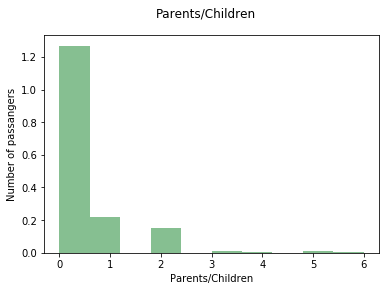

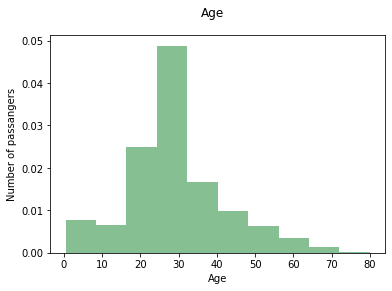

In [381]:
plt.figure()
histdist1 = df.Fare.plot(kind='hist', bins = 2, subplots=True, sharex=True, sharey=True, title='Fare', color='#86bf91', figsize = (10, 5))
plt.xlabel('Prices')
plt.ylabel('Number of passangers')
print(histdist1)

plt.figure()
histdist2 = df.Survived.plot(kind='hist', bins = 2, subplots=True, sharex=True, sharey=True, title='Survived', color='#86bf91')
plt.xlabel('Survived')
plt.ylabel('Number of passangers')
print(histdist2)

plt.figure()
histdist3 = df.Pclass.plot(kind='hist', subplots=True, sharex=True, sharey=True, title='Passanger class', color='#86bf91')
plt.xlabel('Class')
plt.ylabel('Number of passangers')
print(histdist3)

plt.figure()
histdist4 = df.SibSp.plot(kind='hist', subplots=True, sharex=True, sharey=True, title='Siblings/Spouses', color='#86bf91')
plt.xlabel('Siblings/Spouses')
plt.ylabel('Number of passangers')
print(histdist4)

plt.figure()
histdist5 = df.Parch.plot(kind='hist', subplots=True, sharex=True, sharey=True, title='Parents/Children', color='#86bf91')
plt.xlabel('Parents/Children')
plt.ylabel('Number of passangers')
print(histdist5)

plt.figure()
histdist6 = df.Age.plot(kind='hist', subplots=True, sharex=True, sharey=True, title='Age', color='#86bf91')
plt.xlabel('Age')
plt.ylabel('Number of passangers')
print(histdist6)

print('Отнормируем признаки:')
plt.figure()
histdist1 = df.Fare.plot(kind='hist', subplots=True, sharex=True, sharey=True, density = True, title='Fare', color='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Number of passangers')
print(histdist1)

plt.figure()
histdist2 = df.Survived.plot(kind='hist', bins = 2, subplots=True, sharex=True, sharey=True, density = True, title='Survived', color='#86bf91')
plt.xlabel('Survived')
plt.ylabel('Number of passangers')
print(histdist2)

plt.figure()
histdist3 = df.Pclass.plot(kind='hist', subplots=True, sharex=True, sharey=True, density = True, title='Passanger class', color='#86bf91')
plt.xlabel('Class')
plt.ylabel('Number of passangers')
print(histdist3)

plt.figure()
histdist4 = df.SibSp.plot(kind='hist', subplots=True, sharex=True, sharey=True, density = True, title='Siblings/Spouses', color='#86bf91')
plt.xlabel('Siblings/Spouses')
plt.ylabel('Number of passangers')
print(histdist4)

plt.figure()
histdist5 = df.Parch.plot(kind='hist', subplots=True, sharex=True, sharey=True, density = True, title='Parents/Children', color='#86bf91')
plt.xlabel('Parents/Children')
plt.ylabel('Number of passangers')
print(histdist5)

plt.figure()
histdist6 = df.Age.plot(kind='hist', subplots=True, sharex=True, sharey=True, density = True, title='Age', color='#86bf91')
plt.xlabel('Age')
plt.ylabel('Number of passangers')
print(histdist6)

print('Отсюда видно, что при нормировании данных одна из гистограмм - распределение цены билета (Fare) - стала выглядеть гораздо правдоподобнее. Остальные гистогаммы не изменились, при этом график распределения Age лучше оставить в первоначальном варианте, т.к. там было указано именно количество пассажиров, а сам график не изменился. С точки зрения машинного обучения, вещественные признаки не всегда отражают реальные числовые расстояния, и поэтому на новых данных рассчитывается не та "разница", которая была содержательно заложена в категориях, данных в числовом формате.')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [365]:
dumclass = pd.get_dummies(df["Pclass"],prefix="Pclass")
dumembark =  pd.get_dummies(df["Embarked"], prefix = "Embarked")
dumsex = pd.get_dummies(df["Sex"], prefix = "Sex")
print(dumclass, dumembark, dumsex)

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]      Embarked_C  Embarked_Na  Embarked_Q  Embarked_S
0             0            0           0           1
1             1            0           0           0
2             0            0           0           1
3             0            0           0           1
4             0            0           0           1
..          ...          ...         ...         ...
886           0            0           0           1
887           0            0           0           1
888           0            0           0           1
889           1            0          

## Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

Text(0.5, 0, 'Age')

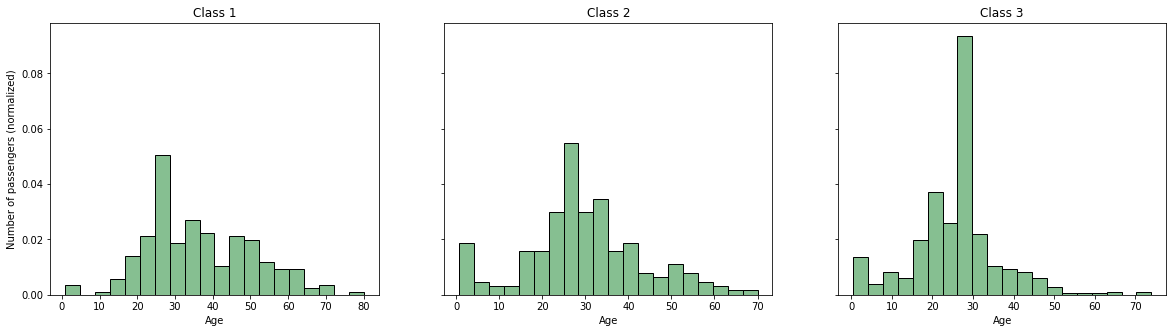

In [374]:
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (20, 5))
axes[0].hist(df[df['Pclass'] == 1]['Age'], bins = 20, 
             ec = 'black', color='#86bf91', density = True)
axes[0].set_title('Class 1')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of passengers (normalized)')
axes[1].hist(df[df['Pclass'] == 2]['Age'], bins = 20, 
             ec = 'black', color='#86bf91', density = True)
axes[1].set_title('Class 2')
axes[1].set_xlabel('Age')
axes[2].hist(df[df['Pclass'] == 3]['Age'], bins = 20, 
             ec = 'black', color='#86bf91', density = True)
axes[2].set_title('Class 3')
axes[2].set_xlabel('Age')

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. 

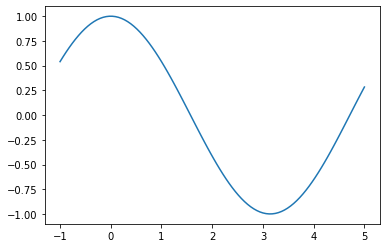

In [384]:
x = np.linspace (-1, 5, 100)
plt.plot (x, np.cos(x))
plt.show()

### 27

Используя функцию из задания №10 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_

[-1.71645873 -0.3599179   0.23143187  0.59929986  1.82964723  1.3681851
 -0.39452373 -0.58934369  0.45395299  0.45514368  0.55322201 -0.92194741
  1.70055582  1.88981718 -1.85643004 -0.80479647  1.33373199  0.36350768
 -1.44114265 -0.31934397 -1.26398418  0.45593359  1.33705596 -0.51422429
 -0.85370742  1.38443738 -1.40314427 -0.4145534   1.41775829 -1.26437659
  0.81298441 -0.74310208 -0.38807586 -0.12004945 -0.24687235 -1.80345022
  1.25084609  0.97564662  0.45136641 -1.94933939 -1.56140855 -1.40045258
 -1.73213388 -0.33637595 -0.74877491 -1.01418846  0.05820797 -0.03886302
  1.37257534 -0.25967174]
[-6.59385131e+00 -1.05514495e+00  1.83191118e+00  4.49895123e+00
  6.38438163e+00  4.23853579e+00 -3.37913177e+00 -4.54990203e+00
  1.71600831e+00  4.01762991e+00  1.73585900e+00 -2.26462739e+00
  4.48691620e+00  6.10924147e+00 -5.48975599e+00 -4.46942523e+00
  6.47120268e+00  1.50678177e+00 -6.06354347e+00 -2.81810420e+00
 -5.67483025e+00  3.96283574e+00  6.23970476e+00 -1.12309661e-01
 

Text(0, 0.5, 'y')

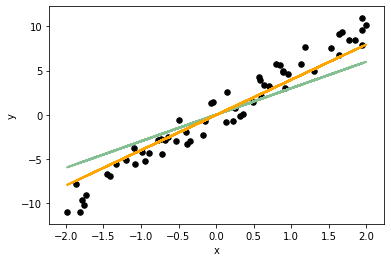

In [408]:
!pip install seaborn
!pip install sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

data_x, data_y = gen_data((-2, 2), 4, 0, 50, 2.5)
print(data_x)
print(data_y)
data_xnew = data_x.reshape(-1, 1)
data_ynew = data_y.reshape(-1, 1)
regr = LR()
regr.fit(data_xnew, data_ynew)
k_learned, b_learned = regr.coef_, regr.intercept_

data_x, data_y = gen_data((-2, 2), 5, 1, 60, 2)
data_xnew = data_x.reshape(-1, 1)
data_ynew = data_y.reshape(-1, 1)
plt.plot(data_xnew, 3*data_xnew, color = '#86bf91', linewidth = 2)
plt.plot(data_xnew, b_learned + k_learned*data_xnew, color = 'orange', linewidth = 2)
plt.scatter(data_xnew, data_ynew, s = 30, color = 'black')
plt.xlabel('x')
plt.ylabel('y')